<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #264653; text-align: right; ">Created By: Chander Mohan</h1>

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #081c15; text-align: center; line-height: 1.25;">Recommender System<br><span style="color: #1b4332; font-size: 48px"><b>🎥Movies Recommendation📹</b></span><br><span style="color: #52b788; font-size: 20px">📀Using Content-Based and Deep Learning Approaches</span></h1>
<hr>

![img](https://static.vecteezy.com/system/resources/previews/006/014/383/original/it-s-movie-time-print-concept-with-lettering-watching-cinema-with-popcorn-film-reel-movie-cracker-flat-hand-drawn-illustration-vector.jpg)

#### **Hi👋**

#### **Thanks for coming. I really appreciate your support**

Recommender system is essentially a system/model/algoritm intended to give suggestion of relevant items to the users. It can be movie, music, and many more. Generally speaking, when it comes to the relation between users and service providers or buyers and e-commerce, recommendations will be extremely needed. In the end, decent recommendations will be a win-win solution that benefits both parties as the users are more royal because they got what they wanted and the service providers gained more profit. You may think, how impactful  those recommendations are? in fact, it's massive. 

According to McKindsey, recommendations plays a crucial role in:
* **40%** of app installs on Google Play
* **60%** of watch time on Youtube
* **35%** of puchase on Amazon
* **75%** of movies watched on Netflix



#### **Let's jump right away to the code!**

In [208]:
import pandas as pd
import numpy as np

# Exploring Movie Dataset

In [209]:
df = pd.read_csv("Data/movies.csv")

In [210]:
df.head()

,backdrop_path,id,title,original_title,overview,poster_path,genre_ids,popularity,release_date,vote_average,vote_count
0,/oe7mWkvYhK4PLRNAVSvonzyUXNy.jpg,359410,Road House,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,"[28, 53]",2433.669,2024-03-08,7.204,1093.0
1,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,693134,Dune: Part Two,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,"[878, 12]",752.461,2024-02-27,8.357,2367.0
2,/sR0SpCrXamlIkYMdfz83sFn5JS6.jpg,823464,Godzilla x Kong: The New Empire,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,"[28, 878, 12]",4436.632,2024-03-27,6.737,308.0
3,/pwGmXVKUgKN13psUjlhC9zBcq1o.jpg,634492,Madame Web,Madame Web,"Forced to confront revelations about her past,...",/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,"[28, 14]",1497.734,2024-02-14,5.637,917.0
4,/fS89P93Lq6pyT7d8ox8AMAEtXUs.jpg,792307,Poor Things,Poor Things,Brought back to life by an unorthodox scientis...,/kCGlIMHnOm8JPXq3rXM6c5wMxcT.jpg,"[878, 10749, 35]",416.367,2023-12-07,7.820,2914.0


In [211]:
df.isna().sum()

backdrop_path     0
id                0
title             0
original_title    0
overview          0
poster_path       0
genre_ids         0
popularity        0
release_date      0
vote_average      0
vote_count        0
dtype: int64

In [212]:
df.dtypes

backdrop_path      object
id                  int64
title              object
original_title     object
overview           object
poster_path        object
genre_ids          object
popularity        float64
release_date       object
vote_average      float64
vote_count        float64
dtype: object

In [213]:
df.describe()

,id,popularity,vote_average,vote_count
count,9.754000e+03,9754.000000,9754.000000,9754.000000
mean,3.171314e+05,31.773033,6.491222,1695.774041
std,3.760384e+05,73.356113,1.186348,3065.374110
min,3.000000e+00,0.600000,0.000000,0.000000
25%,1.099025e+04,15.143500,6.030250,185.000000
50%,7.934750e+04,22.252000,6.610000,616.000000
75%,5.723920e+05,32.588500,7.199500,1728.750000
max,1.268102e+06,4436.632000,10.000000,35485.000000


In [214]:
df[df["vote_count"]==0].head()

,backdrop_path,id,title,original_title,overview,poster_path,genre_ids,popularity,release_date,vote_average,vote_count
48,/fbpRZU7gH7wrNPypbBv3vkek75w.jpg,929590,Civil War,Civil War,"In the near future, a group of war journalists...",/sh7Rg8Er3tFcN9BpKIPOMvALgZd.jpg,"[28, 878, 18]",97.627,2024-04-10,0.0,0.0
91,/uLhWh1pggjIiQ1DpL0DvaIgERQR.jpg,653346,Kingdom of the Planet of the Apes,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,/fAjyUDKABSehK6pHWvh9ket5X3z.jpg,"[878, 12, 28]",220.061,2024-05-08,0.0,0.0
120,/q8IEFmEGGSGmAWfwRs23XDwdFN4.jpg,786892,Furiosa: A Mad Max Saga,Furiosa: A Mad Max Saga,"As the world falls, young Furiosa is snatched ...",/iADOJ8Zymht2JPMoy3R7xceZprc.jpg,"[878, 28, 12]",100.219,2024-05-22,0.0,0.0
143,/7g7cAWKvMKnzJQCxYE4OHfx131t.jpg,945961,Alien: Romulus,Alien: Romulus,While scavenging the deep ends of a derelict s...,/k7bclFV4hWIdgNcLileBKGWFIa9.jpg,"[878, 27, 53]",31.992,2024-08-14,0.0,0.0
148,/nbq3LfgLXnL5ixZ1Q74jTJmhmTS.jpg,533535,Deadpool & Wolverine,Deadpool & Wolverine,"Third entry in the ""Deadpool"" franchise. Plot ...",/uxBHXaoOvAwy4NpPpP7nNx2rXYQ.jpg,"[35, 878, 12]",126.255,2024-07-24,0.0,0.0


In [215]:
df["overview"][1]

'Follow the mythic journey of Paul Atreides as he unites with Chani and the Fremen while on a path of revenge against the conspirators who destroyed his family. Facing a choice between the love of his life and the fate of the known universe, Paul endeavors to prevent a terrible future only he can foresee.'

In [216]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the release year from the 'release_date' column
df['release_year'] = df['release_date'].dt.year


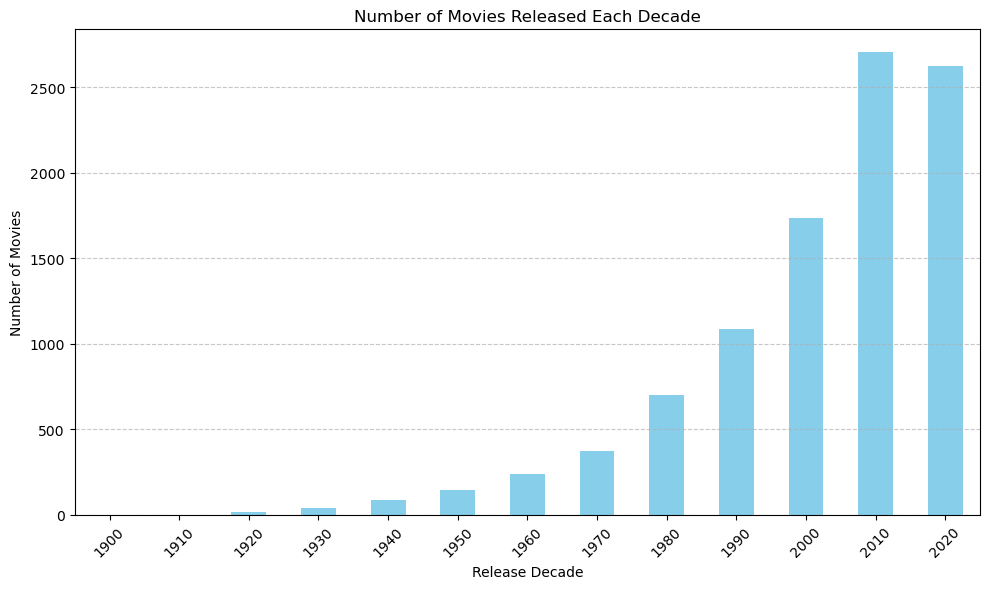

In [217]:
df['release_decade'] = df['release_date'].dt.year // 10 * 10

# Group the dataset by 'release_decade' and count the number of movies in each decade
movies_per_decade = df.groupby('release_decade').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
movies_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Decade')
plt.xlabel('Release Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

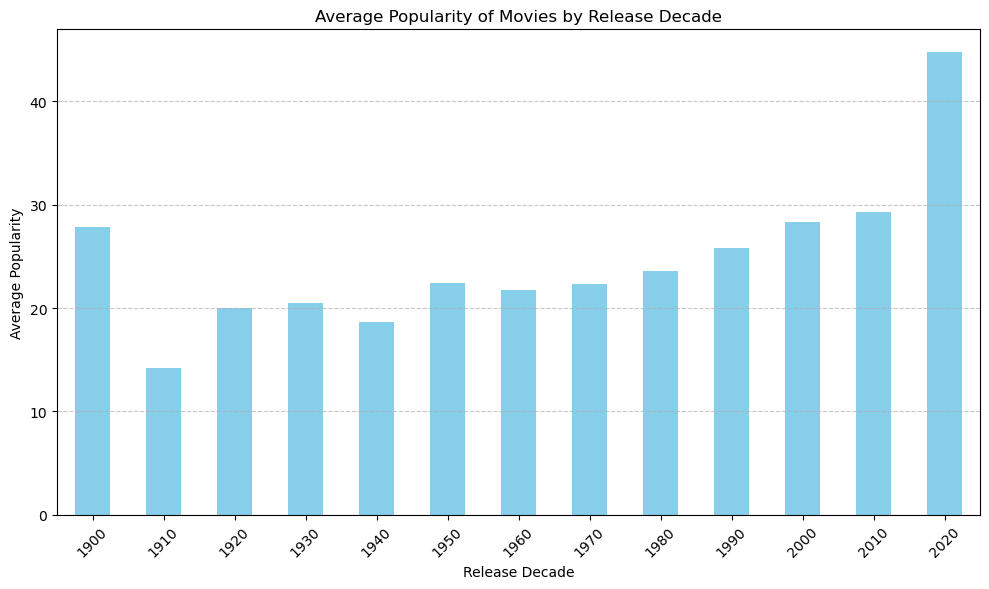

In [218]:
avg_popularity_by_decade = df.groupby('release_decade')['popularity'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
avg_popularity_by_decade.plot(kind='bar', color='skyblue')
plt.title('Average Popularity of Movies by Release Decade')
plt.xlabel('Release Decade')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [219]:
import plotly.express as px

# Create an interactive scatter plot with movie names in hover information
fig = px.scatter(df, x='release_decade', y='popularity', 
                 title='Popularity of Movies vs Release Decade',
                 labels={'release_decade': 'Release Decade', 'popularity': 'Popularity'},
                 opacity=0.5,  # Adjust the opacity of points
                 trendline='ols',  # Add an ordinary least squares trendline
                 hover_name='title')  # Specify the column containing movie names for hover information


# Show the plot
fig.show()

In [220]:
import plotly.express as px

# Group the data by decade and count the number of movies in each decade
decade_counts = df['release_decade'].value_counts().reset_index()
decade_counts.columns = ['Decade', 'Number of Movies']

# Create a pie chart
fig = px.pie(decade_counts, values='Number of Movies', names='Decade',
             title='Number of Movies Released by Decade')

# Show the plot
fig.show()

In [221]:
df_needed = df[["id","title","overview"]]

In [222]:
df_needed.head()

len(df_needed)

9754

# Crew_Data_Analysis

In [223]:
crew_df = pd.read_csv("Data/crew_details.csv")

In [224]:
crew_df.head()

,id,name,profile_path,department,job,movie_id
0,11694,Doug Liman,/kIT7NE6MDaiIrjPEbObXk4COFVa.jpg,Directing,Director,359410
1,1091,Joel Silver,/5YWxIdEql8yyGWIcF1X3QPQ40u6.jpg,Production,Producer,359410
2,137427,Denis Villeneuve,/433lXlkdMGXzrpwnKM4Ul1sln15.jpg,Directing,Director,693134
3,137427,Denis Villeneuve,/433lXlkdMGXzrpwnKM4Ul1sln15.jpg,Production,Producer,693134
4,114408,Mary Parent,/4SiCFwZhHwai9zL0GlcjAbMeBnL.jpg,Production,Producer,693134


In [225]:
crew_df.duplicated().sum()

80

In [226]:
# Assuming df is your DataFrame
duplicate_rows = crew_df[crew_df.duplicated()]

In [227]:
duplicate_rows

,id,name,profile_path,department,job,movie_id
9661,543505,Jake Johnson,/3gASdJlbZYxTDYMaX6ALo4BDEjN.jpg,Directing,Director,1072876
9662,543505,Jake Johnson,/3gASdJlbZYxTDYMaX6ALo4BDEjN.jpg,Production,Producer,1072876
9663,1117879,Ali Bell,NaN,Production,Producer,1072876
9664,1516870,Joe Hardesty,/823drgVhsznjGB2hmSbgURVQAmW.jpg,Production,Producer,1072876
19990,74619,Sean Anders,/vWO1FiGZPOL4FdhbxeykOXRfcXJ.jpg,Directing,Director,419680
...,...,...,...,...,...,...
40364,2088121,Daniel Engelhardt,NaN,Production,Producer,227425
40784,570239,Hiroyasu Ishida,/yeT7rJz2VxAbHqsa8wdaKWz3FIH.jpg,Directing,Director,508422
40785,3168038,Taku Matsuo,NaN,Production,Producer,508422
40786,1735187,Katsuhiro Takei,/8x2aVss0atoUlH0ID3Oboro6Mhd.jpg,Production,Producer,508422


In [228]:
crew_df = crew_df.drop_duplicates()

In [229]:
crew_df.isna().sum() 

id                  0
name                0
profile_path    15852
department          0
job                 0
movie_id            0
dtype: int64

In [232]:
len(crew_df["movie_id"].unique())

9729

In [233]:
grouped = crew_df[crew_df['department'] == 'Production'].groupby(['movie_id', 'department'])

# Get the first occurrence of each group
first_producer_per_movie = grouped.first().reset_index()

# Print the resulting DataFrame
first_producer_per_movie

,movie_id,department,id,name,profile_path,job
0,3,Production,54767,Mika Kaurismäki,/braCGIvRB2I8VIKh9ZZM4H555Mo.jpg,Producer
1,5,Production,2545,Lawrence Bender,/mZRwkIvUj8USnS7Jfwd6VdHkY2x.jpg,Producer
2,6,Production,71417,Gene Levy,None,Producer
3,11,Production,12401,Gary Kurtz,/q6tgPiNqzEOIYmHxMrpWoUirmmu.jpg,Producer
4,12,Production,9,Graham Walters,/rmFFUsCJBjtl2xgsED6hODix9cy.jpg,Producer
...,...,...,...,...,...,...
8920,1257130,Production,4095637,Ewa Latkowska,None,Producer
8921,1258745,Production,1460276,Adam Friedlander,None,Producer
8922,1259365,Production,5655,Wes Anderson,/b1LH059EGnU01rsZwcqYzNjY7w9.jpg,Producer
8923,1259687,Production,3114789,Yagoo,/gTJT9w2zlZqxWp7Rz8Hf6W88z17.jpg,Producer


In [234]:
crew = first_producer_per_movie[first_producer_per_movie["movie_id"]==693134]

In [235]:
crew

,movie_id,department,id,name,profile_path,job
7380,693134,Production,137427,Denis Villeneuve,/433lXlkdMGXzrpwnKM4Ul1sln15.jpg,Producer


In [236]:
crew_df

,id,name,profile_path,department,job,movie_id
0,11694,Doug Liman,/kIT7NE6MDaiIrjPEbObXk4COFVa.jpg,Directing,Director,359410
1,1091,Joel Silver,/5YWxIdEql8yyGWIcF1X3QPQ40u6.jpg,Production,Producer,359410
2,137427,Denis Villeneuve,/433lXlkdMGXzrpwnKM4Ul1sln15.jpg,Directing,Director,693134
3,137427,Denis Villeneuve,/433lXlkdMGXzrpwnKM4Ul1sln15.jpg,Production,Producer,693134
4,114408,Mary Parent,/4SiCFwZhHwai9zL0GlcjAbMeBnL.jpg,Production,Producer,693134
...,...,...,...,...,...,...
41283,11447,Albert Hughes,/9wfPXTkur93ZUyUH35lBQRNSY3y.jpg,Directing,Director,11443
41284,11447,Albert Hughes,/9wfPXTkur93ZUyUH35lBQRNSY3y.jpg,Production,Producer,11443
41285,11448,Allen Hughes,/haznGyeI8mEPEtDA16D14I3QZJZ.jpg,Production,Producer,11443
41286,11447,Albert Hughes,/9wfPXTkur93ZUyUH35lBQRNSY3y.jpg,Writing,Writer,11443


In [237]:
import pandas as pd

# Assuming df is your DataFrame 
# Filter rows for Producer
producers_df = crew_df[crew_df['job'] == 'Producer']

# Group by movie_id 
grouped = producers_df.groupby('movie_id')

# Get the first producer for each movie
first_producer_per_movie = grouped.first().reset_index()

# Print the resulting DataFrame
first_producer_per_movie

,movie_id,id,name,profile_path,department,job
0,3,54767,Mika Kaurismäki,/braCGIvRB2I8VIKh9ZZM4H555Mo.jpg,Production,Producer
1,5,2545,Lawrence Bender,/mZRwkIvUj8USnS7Jfwd6VdHkY2x.jpg,Production,Producer
2,6,71417,Gene Levy,None,Production,Producer
3,11,12401,Gary Kurtz,/q6tgPiNqzEOIYmHxMrpWoUirmmu.jpg,Production,Producer
4,12,9,Graham Walters,/rmFFUsCJBjtl2xgsED6hODix9cy.jpg,Production,Producer
...,...,...,...,...,...,...
8920,1257130,4095637,Ewa Latkowska,None,Production,Producer
8921,1258745,1460276,Adam Friedlander,None,Production,Producer
8922,1259365,5655,Wes Anderson,/b1LH059EGnU01rsZwcqYzNjY7w9.jpg,Production,Producer
8923,1259687,3114789,Yagoo,/gTJT9w2zlZqxWp7Rz8Hf6W88z17.jpg,Production,Producer


In [238]:
import pandas as pd

# Assuming df is your DataFrame
# Filter rows for Producer
Director_df = crew_df[crew_df['job'] == 'Director']

# Group by movie_id
grouped = Director_df.groupby('movie_id')

# Get the first producer for each movie
first_Director_per_movie = grouped.first().reset_index()

# Print the resulting DataFrame
first_Director_per_movie

,movie_id,id,name,profile_path,department,job
0,3,16767,Aki Kaurismäki,/kiJErWEOv4Ew7aHOGKg4ljsmppZ.jpg,Directing,Director
1,5,3110,Allison Anders,/tP9x5lWT4EofhiGITfnmmfpZShA.jpg,Directing,Director
2,6,2042,Stephen Hopkins,/9xjYIKLW7Ylse206sMmiDDdUz66.jpg,Directing,Director
3,11,1,George Lucas,/WCSZzWdtPmdRxH9LUCVi2JPCSJ.jpg,Directing,Director
4,12,7,Andrew Stanton,/tRwWuo06aN9vuXAPaswMN42x2ii.jpg,Directing,Director
...,...,...,...,...,...,...
9720,1261924,2163600,Jenny Popplewell,None,Directing,Director
9721,1262540,2346668,Kan Benben,/1kohzil0Rb0rbBG45Bo7MKBE7cZ.jpg,Directing,Director
9722,1263249,237089,Stefano Milla,/6mBqD7PUKOmFyYYM90UmLHtFw94.jpg,Directing,Director
9723,1263309,130050,Colin Theys,None,Directing,Director


In [241]:
first_Director_per_movie.rename(columns={'name': 'Director_Name'}, inplace=True)

In [242]:
first_producer_per_movie.rename(columns={'name': 'Producer_Name'}, inplace=True)

In [243]:
first_Director_per_movie.head()

,movie_id,id,Director_Name,profile_path,department,job
0,3,16767,Aki Kaurismäki,/kiJErWEOv4Ew7aHOGKg4ljsmppZ.jpg,Directing,Director
1,5,3110,Allison Anders,/tP9x5lWT4EofhiGITfnmmfpZShA.jpg,Directing,Director
2,6,2042,Stephen Hopkins,/9xjYIKLW7Ylse206sMmiDDdUz66.jpg,Directing,Director
3,11,1,George Lucas,/WCSZzWdtPmdRxH9LUCVi2JPCSJ.jpg,Directing,Director
4,12,7,Andrew Stanton,/tRwWuo06aN9vuXAPaswMN42x2ii.jpg,Directing,Director


In [244]:
first_producer_per_movie.head()

,movie_id,id,Producer_Name,profile_path,department,job
0,3,54767,Mika Kaurismäki,/braCGIvRB2I8VIKh9ZZM4H555Mo.jpg,Production,Producer
1,5,2545,Lawrence Bender,/mZRwkIvUj8USnS7Jfwd6VdHkY2x.jpg,Production,Producer
2,6,71417,Gene Levy,None,Production,Producer
3,11,12401,Gary Kurtz,/q6tgPiNqzEOIYmHxMrpWoUirmmu.jpg,Production,Producer
4,12,9,Graham Walters,/rmFFUsCJBjtl2xgsED6hODix9cy.jpg,Production,Producer


In [245]:
merged_df = pd.merge(first_Director_per_movie,first_producer_per_movie, on='movie_id',how='left')
# merged_df = merged_df[merged_df["movie_id","Director_Name", "Producer_Name"]]

In [246]:
a = merged_df[["movie_id","Director_Name", "Producer_Name"]]

In [247]:
a

,movie_id,Director_Name,Producer_Name
0,3,Aki Kaurismäki,Mika Kaurismäki
1,5,Allison Anders,Lawrence Bender
2,6,Stephen Hopkins,Gene Levy
3,11,George Lucas,Gary Kurtz
4,12,Andrew Stanton,Graham Walters
...,...,...,...
9720,1261924,Jenny Popplewell,NaN
9721,1262540,Kan Benben,NaN
9722,1263249,Stefano Milla,NaN
9723,1263309,Colin Theys,NaN


# Cast Analysis

In [155]:
cast_detail = pd.read_csv("Data/cast_details.csv")

In [188]:
cast_detail

,id,name,profile_path,movie_id
0,131,Jake Gyllenhaal,/rJdYHYNhlcOBwbPvDZVvt1xw7bi.jpg,359410
1,1784612,Daniela Melchior,/oyULuaCY8FFNEumFNZwjUoUytcR.jpg,359410
2,1199115,Conor McGregor,/mb9i6o3Bj41wL335PSrUKjiHMXq.jpg,359410
3,141034,Billy Magnussen,/bA38HDFxJtwSV4OgSo3yJ1u9H2J.jpg,359410
4,1190668,Timothée Chalamet,/BE2sdjpgsa2rNTFa66f7upkaOP.jpg,693134
...,...,...,...,...
38844,25465,Miyoko Akaza,/cWOQQSyPKNcqQcbzDiYNZPxg3jM.jpg,2487
38845,18291,Larenz Tate,/6BWajF1sbuwsvXHmdQDxP5MfZ5R.jpg,11443
38846,65827,Keith David,/jJLJuR7FNHYL1fB5igjj7IXzOel.jpg,11443
38847,66,Chris Tucker,/f3oQKRJEGjK8Yc4qSMrD5P9oYbg.jpg,11443


In [194]:
cast_detail["movie_id"].value_counts()

movie_id
16318      12
11681       8
72710       8
11918       8
239678      8
           ..
830884      1
1206029     1
654571      1
573952      1
530         1
Name: count, Length: 9728, dtype: int64

In [160]:
combined_cast_df = cast_detail.groupby('movie_id')['name'].apply(', '.join).reset_index()

# Rename the column to 'combined_cast'
combined_cast_df.rename(columns={'name': 'Cast_names'}, inplace=True)

In [185]:
combined_cast_df

,movie_id,Cast_names
0,3,"Matti Pellonpää, Kati Outinen, Sakari Kuosmane..."
1,5,"Tim Roth, Jennifer Beals, Antonio Banderas, Va..."
2,6,"Emilio Estevez, Cuba Gooding Jr., Denis Leary,..."
3,11,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet..."
4,12,"Albert Brooks, Ellen DeGeneres, Alexander Goul..."
...,...,...
9723,1259687,"Roboco, Shirakami Fubuki, Minato Aqua, Murasak..."
9724,1262540,"Yang Tongshu, Liu Chuxuan, Xiaowan Zhang, Shu ..."
9725,1263249,"Jason R. Moore, Ellie Patrikios, Neil Cole, De..."
9726,1263309,"Maeve Quinlan, Cass Huckabay, Natalia Dragoumi..."


In [165]:
movie_detail = pd.read_csv("Data/movie_details.csv")

In [166]:
movie_detail

,budget,genres,imdb_id,movie_id,runtime,tagline
0,85000000,"Action, Thriller",tt3359350,359410,121,Take it outside.
1,190000000,"Science Fiction, Adventure",tt15239678,693134,167,Long live the fighters.
2,135000000,"Action, Science Fiction, Adventure",tt14539740,823464,115,Rise together or fall alone.
3,80000000,"Action, Fantasy",tt11057302,634492,116,Her web connects them all.
4,35000000,"Science Fiction, Romance, Comedy",tt14230458,792307,142,She's like nothing you've ever seen.
...,...,...,...,...,...,...
9749,0,"Documentary, Music",tt31415596,1247793,85,NaN
9750,1800000,"Drama, Adventure",tt6062774,417466,103,Survival is a cruel game.
9751,20000000,Drama,tt0419887,7979,128,There is a way to be good again.
9752,0,"Action, Crime, Drama",tt0158714,2487,97,I threw away my tears. I gave up my heart. I c...


In [168]:
movie_detail.isna().sum() 

budget         0
genres         7
imdb_id      102
movie_id       0
runtime        0
tagline     2075
dtype: int64

In [177]:
detailed_df = pd.merge(movie_detail, df_needed, on='movie_id')

In [198]:
final_df = pd.merge(detailed_df, combined_cast_df , on='movie_id', how = "left")

In [201]:
final_df = pd.merge(final_df, a , on='movie_id', how = "left")

In [207]:
final_df.head() 

,budget,genres,imdb_id,movie_id,runtime,tagline,title,overview,Cast_names,Director_Name,Producer_Name
0,85000000,"Action, Thriller",tt3359350,359410,121,Take it outside.,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,"Jake Gyllenhaal, Daniela Melchior, Conor McGre...",Doug Liman,Joel Silver
1,190000000,"Science Fiction, Adventure",tt15239678,693134,167,Long live the fighters.,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,"Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Denis Villeneuve,Denis Villeneuve
2,135000000,"Action, Science Fiction, Adventure",tt14539740,823464,115,Rise together or fall alone.,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...","Rebecca Hall, Kaylee Hottle, Brian Tyree Henry...",Adam Wingard,Thomas Tull
3,80000000,"Action, Fantasy",tt11057302,634492,116,Her web connects them all.,Madame Web,"Forced to confront revelations about her past,...","Dakota Johnson, Sydney Sweeney, Isabela Merced...",S.J. Clarkson,Lorenzo di Bonaventura
4,35000000,"Science Fiction, Romance, Comedy",tt14230458,792307,142,She's like nothing you've ever seen.,Poor Things,Brought back to life by an unorthodox scientis...,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos,Ed Guiney


In [248]:
final_df[["movie_id", "title", "overview", "genres", "cast_names", "director_name", "producer_name", "tagline"]]

KeyError: "['genrescast_names', 'director_name', 'producer_name'] not in index"